In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("science")
%matplotlib inline

## Penalized least square

$$\min (Y - X \beta)^T(Y - X \beta) + \lambda p(\beta)$$

where
- $X$ : independent variables
- $Y$ : dependent variable
- $\beta$ : parameters
- $p$ : penalty function

## Ridge regression

$$\min (Y - X\beta)^T(Y - X\beta) + \lambda \sum_{j=1}^{r} |\beta_j|^2$$

where $\lambda$ is the regularization parameter

## Dataset

Median house prices for California districts derived from the 1990 US Census

In [2]:
from sklearn.datasets import fetch_california_housing
fetch_data = fetch_california_housing()

In [3]:
print(fetch_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
data = pd.DataFrame(fetch_data["data"])
features = fetch_data["feature_names"]
data.columns = features
target = fetch_data["target_names"][0]
data[target] = fetch_data["target"]

In [5]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Exploratory data analysis

In [6]:
def scatter_plot_feature(feat, target = "MedHouseVal"):
    plt.scatter(data[feat], data[target], c = data[target])
    plt.xlabel(feat)
    plt.ylabel(target)
    plt.show()

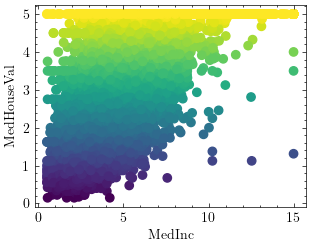

In [7]:
scatter_plot_feature("MedInc")

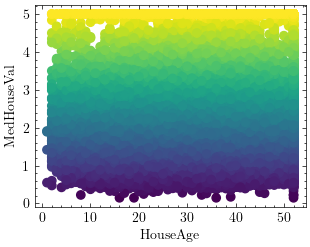

In [8]:
scatter_plot_feature("HouseAge")

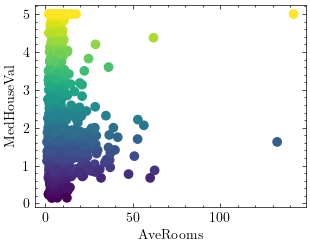

In [9]:
scatter_plot_feature("AveRooms")

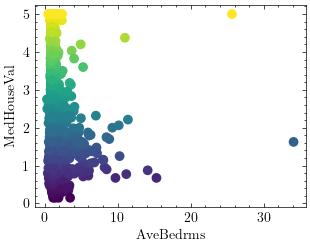

In [10]:
scatter_plot_feature("AveBedrms")

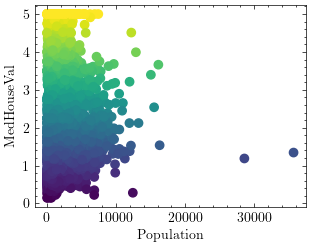

In [11]:
scatter_plot_feature("Population")

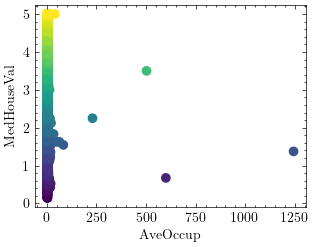

In [12]:
scatter_plot_feature("AveOccup")

## Exploratory spatial data analysis

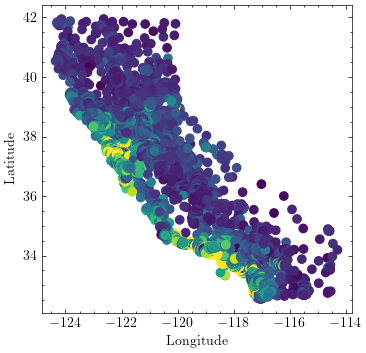

In [13]:
axes, fig = plt.subplots(figsize = (4, 4))
plt.scatter(data["Longitude"], data["Latitude"], c = data["MedHouseVal"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Let's use the US Census data set from https://www.census.gov/cgi-bin/geo/shapefiles/index.php

In [14]:
import geopandas as gpd

In [15]:
geo_data = gpd.read_file("../datasets/tl_2022_us_county.shp")

**California counties**

In [16]:
cali_data = geo_data[geo_data["STATEFP"] == "06"]
m = cali_data.shape[0]
cali_data.index = np.arange(m)

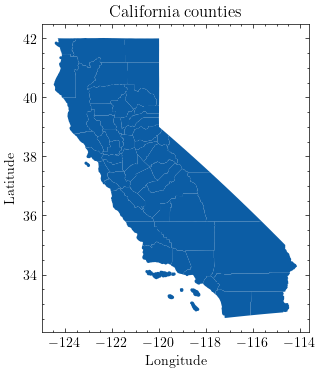

In [17]:
cali_data.plot(figsize = (4, 4))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California counties")
plt.show()

In [18]:
cali_data.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694582,23299110,+39.5769252,-120.5219926,"POLYGON ((-120.55587 39.50874, -120.55614 39.5..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,None,None,None,A,2500063008,75323438,+38.4501363,-121.3443291,"POLYGON ((-121.43991 38.25553, -121.44002 38.2..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,None,None,A,7080858282,2729215451,+34.5366774,-120.0383645,"MULTIPOLYGON (((-120.58226 34.10752, -120.5790..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641837360,43789489,+38.1910682,-120.5541065,"POLYGON ((-120.63179 38.34603, -120.63066 38.3..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,None,None,None,A,4767585001,947376202,+34.3587477,-119.1331453,"MULTIPOLYGON (((-119.63607 33.28071, -119.6347..."


In [19]:
cali_data.index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57],
      dtype='int64')

Add a new variable CountyFP: California county number

In [20]:
from shapely.geometry import Polygon, Point

In [21]:
n = data.shape[0]
data["CountyFP"] = np.repeat("", n)

In [22]:
for i in range(n):
    point = Point(data["Longitude"][i], data["Latitude"][i])
    for j in range(m):
        if cali_data["geometry"][j].contains(point):
            data.at[i, "CountyFP"] = cali_data["COUNTYFP"][j]

**Remove data points with no county information**

In [23]:
data.shape

(20640, 10)

In [24]:
data = data.drop(data[data["CountyFP"] == ""].index)
n = data.shape[0]
data.index = np.arange(n)
data.shape

(20637, 10)

**Median house prices per county**

In [25]:
uniq_counties = data["CountyFP"].unique()
med_per_county = {}
for c in uniq_counties:
    med_per_county[c] = []
for i in range(n):
    county = data.loc[i, "CountyFP"]
    val = data.loc[i, "MedHouseVal"]
    med_per_county[county].append(val)
    #med_per_county[].append()
for c in uniq_counties:
    med_per_county[c] = np.median(med_per_county[c])

**Add median house prices per county to the geo dataset**

In [26]:
med_per_county_df = pd.DataFrame({"COUNTYFP": uniq_counties})
med_per_county_df["MED"] = np.zeros(m)
for j in range(m):
    county_fp = med_per_county_df.at[j, "COUNTYFP"]
    med_per_county_df.at[j, "MED"] = med_per_county[county_fp]

In [27]:
med_per_county_df.head()

,COUNTYFP,MED
0,001,1.9395
1,013,1.8880
2,003,1.1760
3,005,1.1760
4,007,0.8645


In [28]:
cali_data = cali_data.merge(med_per_county_df, on = "COUNTYFP")

**Visualization**

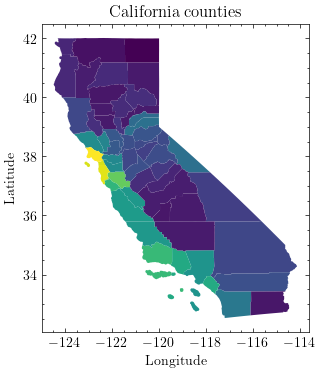

In [29]:
cali_data.plot(column = "MED", figsize = (4, 4))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California counties")
plt.show()

## Features and target variables

**One hot encode counties**

In [30]:
data_cp = data.copy()

In [31]:
for c in uniq_counties:
    data["County" + c] = np.zeros(n)
for i in range(n):
    county = data.loc[i, "CountyFP"]
    data.loc[i, "County" + county] = 1.

In [32]:
for c in uniq_counties:
    features.append("County" + c)

In [33]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,CountyFP,...,County089,County091,County093,County097,County101,County115,County103,County105,County109,County113
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train and test set

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train_data, test_data = train_test_split(data, test_size = 0.3, random_state = 123,
                                        shuffle = True)

In [36]:
x_train = train_data[features]
y_train = train_data[target]
x_test = test_data[features]
y_test = test_data[target]

### Ridge regression

In [37]:
from sklearn.linear_model import Ridge

In [38]:
lambdas = np.array([0.1, 5., 10.])
models = [Ridge(alpha = l)for l in lambdas]

In [39]:
fitted_models = [model.fit(x_train, y_train) for model in models]

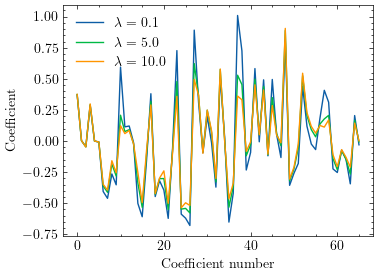

In [40]:
fig, axes = plt.subplots(figsize = (4, 3))
for i in range(lambdas.size):
    plt.plot(fitted_models[i].coef_, label = "$\lambda = $ " + str(lambdas[i]))
plt.xlabel("Coefficient number")
plt.ylabel("Coefficient")
plt.legend()
plt.show()

## Test

In [41]:
y_preds = [model.predict(x_test) for model in fitted_models]

In [42]:
errors = [np.array(np.square(y_pred - y_test)) for y_pred in y_preds]

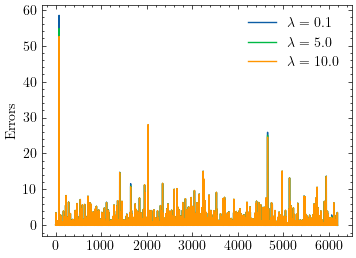

In [43]:
fig, axes = plt.subplots(figsize = (4, 3))
for i in range(lambdas.size):
    plt.plot(errors[i], label = "$\lambda = $ " + str(lambdas[i]))
plt.ylabel("Errors")
plt.legend()
plt.show()

In [44]:
mean_errors = [np.mean(x) for x in errors]

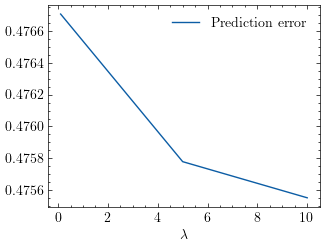

In [45]:
plt.plot(lambdas, mean_errors, label = "Prediction error")
plt.xlabel("$\lambda$")
plt.legend()
plt.show()

## References